# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

#### Читаем  данные и сохраняем их в переменную

In [257]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv' , sep  = '\t')
except:
    pathik = '/content/drive/MyDrive/colab практикум/3_project/3_1.csv'
    data = pd.read_csv(pathik, sep  = '\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Смотрим размеры, как заполнены заголовки

In [260]:
data.shape

(23699, 22)

In [261]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Выводим общий график по датасету

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

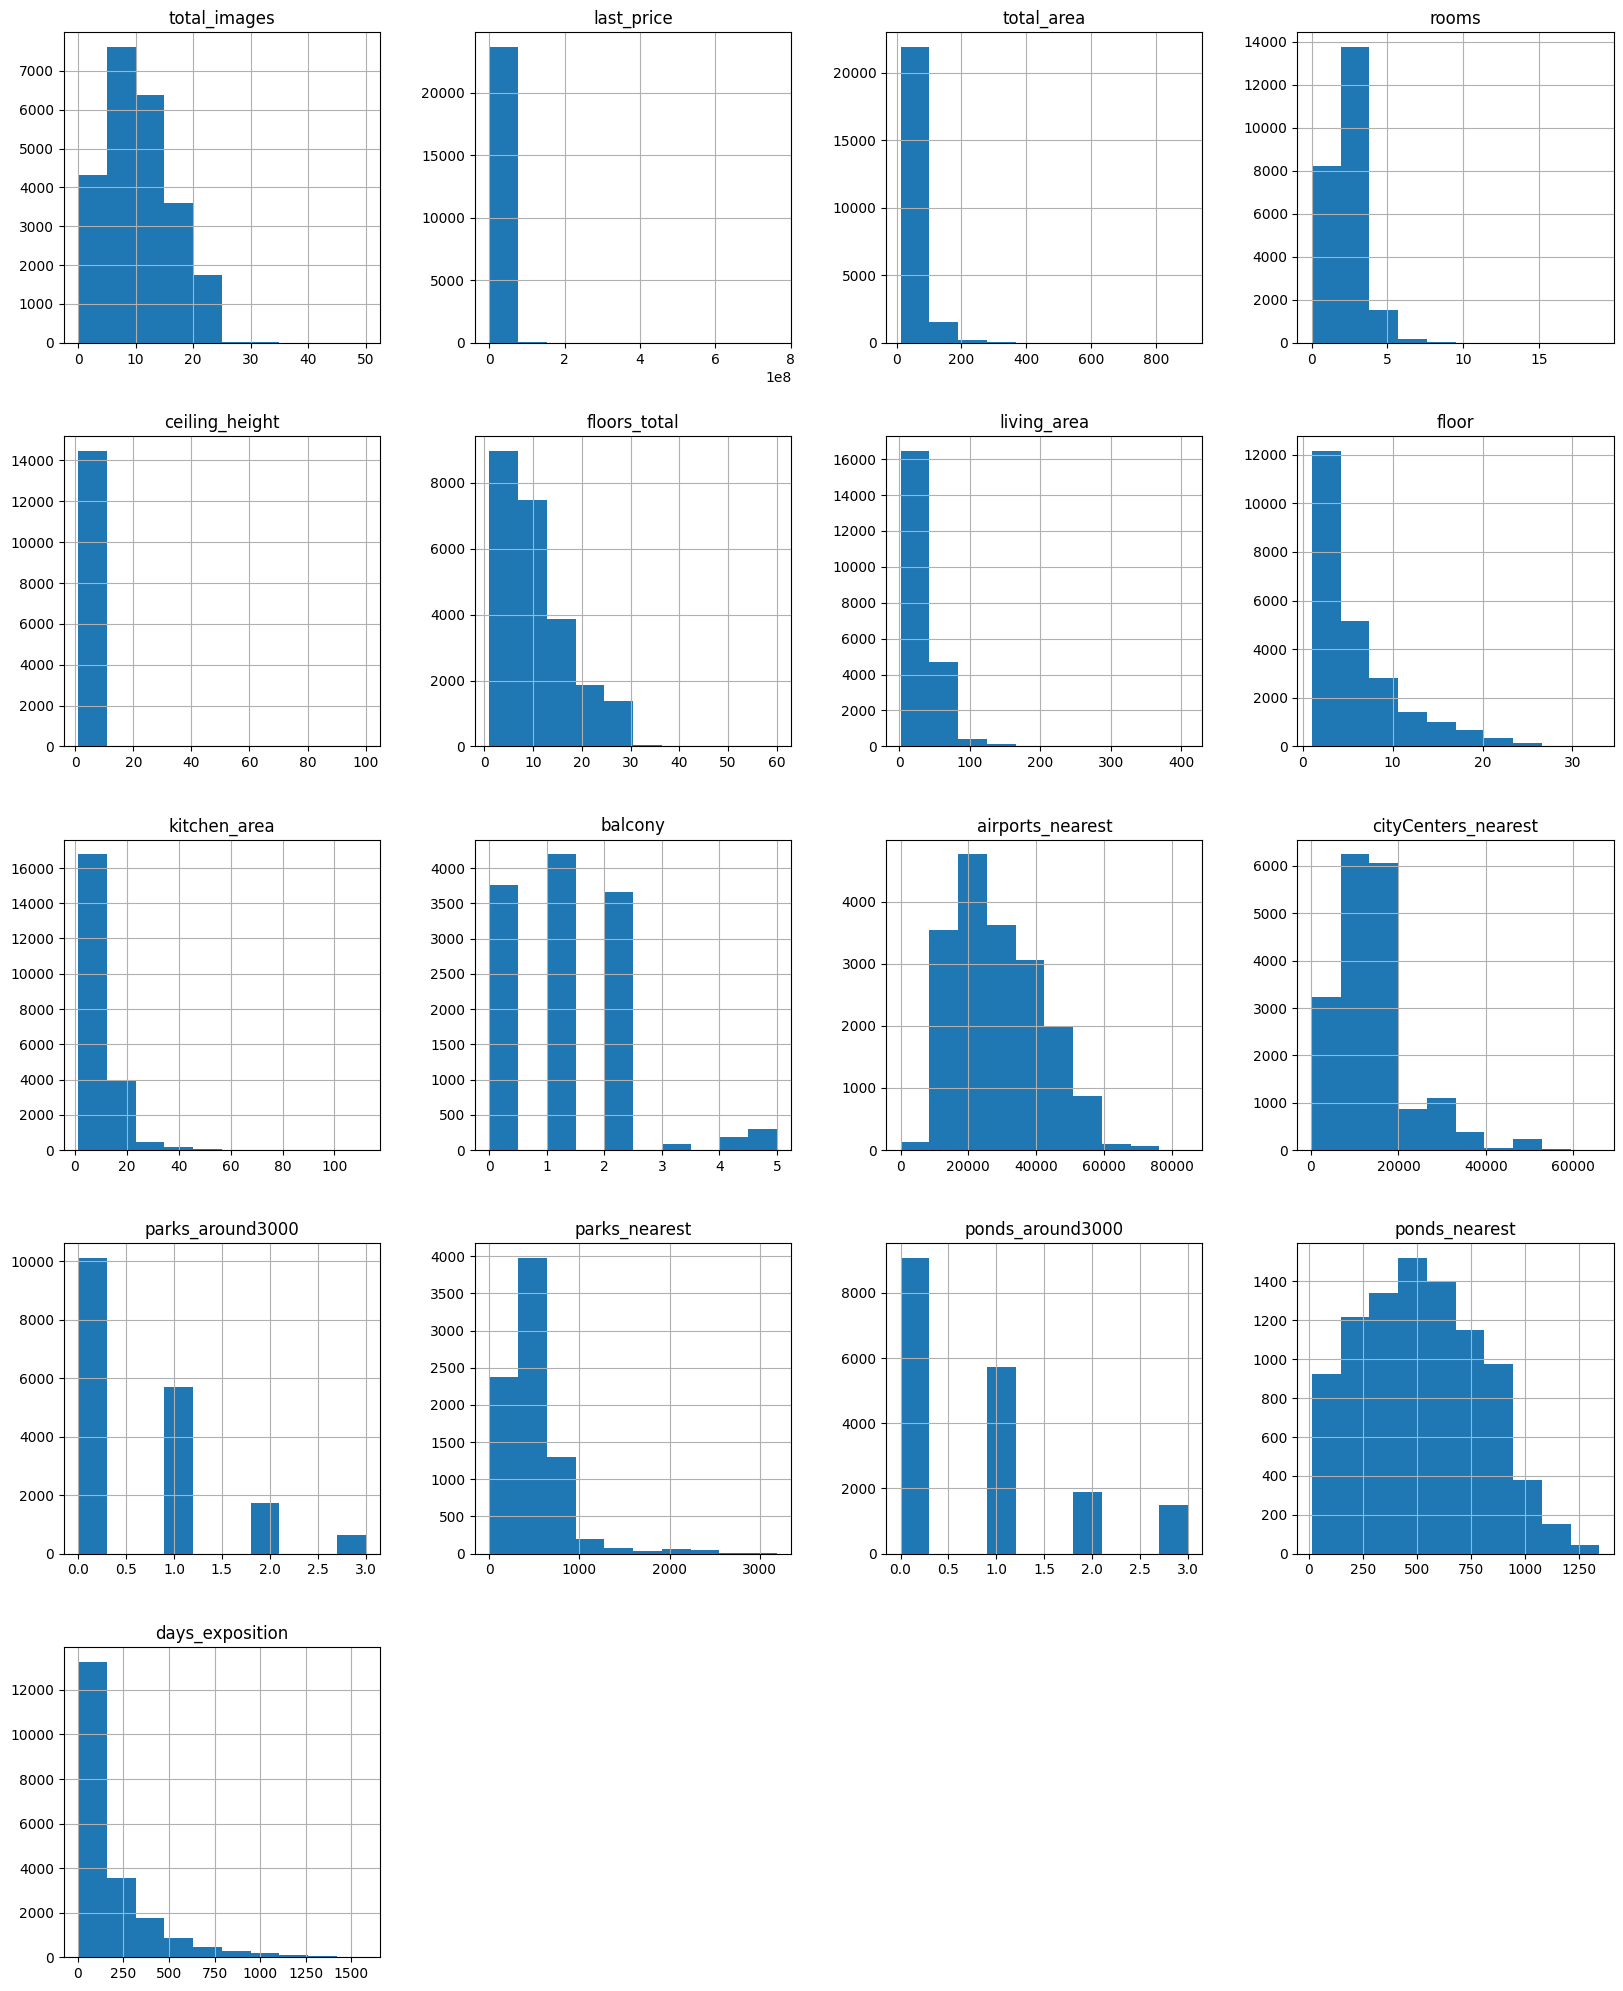

In [262]:
data.hist(figsize=(20, 25))

Вывод: выше представлены графики на которых видно степень распределения значений по диапазонам в которые они входят. на некоторых графиках видно что значения в столбцах категорийные, а на других нет и есть тенденции.

### Выполните предобработку данных

#### Смотрим наличие пропусков

In [263]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Правим аномалию по именам

#### Смотрим цникальные значения

In [264]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

#### Группируем по имени и считаем сколько каких имен у нас есть, благодаря sample  видим случайные 50 значений

In [265]:
data.groupby('locality_name')['locality_name'].count().sort_values().sample(50)

locality_name
деревня Яльгелево                                            6
посёлок Сапёрное                                             2
поселок Кингисеппский                                        2
Колпино                                                    338
деревня Тарасово                                             2
деревня Агалатово                                            4
городской посёлок Павлово                                    9
поселок Семрино                                              5
коттеджный поселок Кивеннапа Север                           1
посёлок Стеклянный                                           5
посёлок городского типа Вырица                              10
посёлок Пудость                                              9
поселок Тёсово-4                                             1
поселок Первомайское                                         8
посёлок городского типа Токсово                             16
посёлок Торфяное                         

#### правим аномалии в заваниях городов

In [266]:
data['locality_name'].nunique()

364

In [267]:
#Меняем ё на е, чтобы было проще
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['ё'], 'е', regex=True)
)

#правим пробелы у аномалий
data['locality_name'] = data['locality_name'].str.replace('поселок', 'поселок ')
data['locality_name'] = data['locality_name'].str.replace('поселок  ', 'поселок ')
data['locality_name'] = data['locality_name'].str.replace('поселок  городского типа', 'поселок ')

# сводим дубли и кривые риводим к общему знаменателю
replacement1 = 'поселок'

to_replace1 = 'коттеджный поселок'
data['locality_name'] = data['locality_name'].str.replace(to_replace1, replacement1)
to_replace2 = 'городской поселок'
data['locality_name'] = data['locality_name'].str.replace(to_replace2, replacement1)
to_replace4 = 'попоселокк'
data['locality_name'] = data['locality_name'].str.replace(to_replace4, replacement1)
to_replace5 = 'попоселоккгородского типа'
data['locality_name'] = data['locality_name'].str.replace(to_replace5, replacement1)
to_replace6 = 'поселокгородского типа'
data['locality_name'] = data['locality_name'].str.replace(to_replace6, replacement1)
to_replace7 = 'садовое товарищество'
data['locality_name'] = data['locality_name'].str.replace(to_replace7, replacement1)
to_replace7 = 'поселокПансионат'
data['locality_name'] = data['locality_name'].str.replace(to_replace7, replacement1)



replacement2 = 'село'

to_replace10 = 'деревня'
data['locality_name'] = data['locality_name'].str.replace(to_replace10, replacement2)
to_replace11 = 'село'
data['locality_name'] = data['locality_name'].str.replace(to_replace11, replacement2)

In [268]:
data['locality_name'].nunique()

329

### Заполняем пропуски  в столбцах

####  Заполняем пропуски в столбце высота потолков на медианное значение по городу. округляем до 2х знаков. обрабатываем аномалию по сверх большим


In [269]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [270]:
#Правим сверх большие
data.loc[data['ceiling_height'] > 5,    'ceiling_height']  =   data['ceiling_height'] / 10

#Правим сверх малые
data.loc[data['ceiling_height'] <=2,    'ceiling_height']  =   data['ceiling_height'].mean()

#округляем до 1 знака
data['ceiling_height'] = round(data['ceiling_height'], 1)

# nan заменяем на стандарт в России 2,4 метра
data['ceiling_height'] = data['ceiling_height'].fillna(2.4)
data['ceiling_height'].unique()

array([ 2.7,  2.4,  3. ,  2.5,  2.6,  2.8,  2.9,  3.2,  3.4,  4.2,  3.5,
        3.3,  4. ,  3.1,  2.3,  3.7,  3.6,  3.8,  5. ,  4.1,  4.7,  3.9,
        4.8,  4.5,  4.4,  4.3,  4.6,  2.2,  4.9, 10. ])

#### Заполняем пропуски в столбце  всего этажей, на среднее значение по городу

In [271]:
# функция ниже ищет среднее по  сгрупированной таблице, и в пустышку записываем полученное среднее
def floor_null(group):
    mean = group['floors_total'].mean()
    group['floors_total'].fillna(mean, inplace=True)
    return group

data = data.groupby('locality_name', group_keys=False).apply(floor_null)

# Колличесво этажей это цело численная переменная, переводим в int
data['floors_total'] =  data['floors_total'].astype(int)

#### Заполняем пропуски в столбце жилая площадь.

In [272]:
# функция ниже ищет среднее по  сгрупированной таблице, и в пустышку записываем полученное среднее
# расчатывается через % от общей площади +  медиана по городу
def area_null(group):
    area = (group['living_area']  / group['total_area'] *100).mean()
    group['living_area'].fillna(group['total_area'] *(area /100), inplace=True)

    return group

data = data.groupby('locality_name', group_keys=False ).apply(area_null)

# Оставляем значения только с двумя значками после запятой
data['living_area'] = round(data['living_area'], 2)


#### Заполняем пропуски в столбце площадь кухни на среднее по городу

In [273]:
def kitc_null(group):
    area = ((data['living_area'] -  data['kitchen_area'])  / data['total_area'] *100).mean()
    group['kitchen_area'].fillna(data['living_area'] *(area /100), inplace=True)
    return group

data = data.groupby('locality_name', group_keys=False).apply(kitc_null)


# Оставляем значения только с двумя значками после запятой
data['kitchen_area'] = round(data['kitchen_area'], 2)

#### заполняем пропуски в столбце сколько дней продавалось по среднему по городам

In [274]:
# функция ниже ищет среднее по  сгрупированной таблице, и в пустышку записываем полученное среднее
def days_null(group):
    mean = round(group['days_exposition'].mean(), 0)
    group['days_exposition'].fillna(mean, inplace=True)
    return group

data = data.groupby('locality_name', group_keys=False).apply(days_null)

#все что не смогли обработать в группе делаем через медиану
data['days_exposition'] =  data['days_exposition'].fillna(data['days_exposition'].median())

#### заполняем пропуски в столбце растояние до центра

In [275]:
def city_range_null(group):
    mean = round(group['cityCenters_nearest'].mean(), 0)
    group['cityCenters_nearest'].fillna(mean, inplace=True)
    return group

data = data.groupby('locality_name',group_keys=False).apply(city_range_null)

#все что не смогли обработать в группе делаем через медиану
data['cityCenters_nearest'] =  data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())


#### Заполняем пропуски в столбце кол-во балконов .

In [276]:
#Т.к. балконов может не быть, если не указано, то меняем на 0
data['balcony'] = data['balcony'].fillna(0)

#### Правим типы данных. и заменяем пустышки на 0 там где не требуется замена.

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23633 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23634 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [278]:
#Меняем тип данных столбца со временем чтобы с ним можно было работать
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst= True)

# Меняем тип данных в стобце на bool т.к. это пармаентры по правилу 1 /0
data['is_apartment'] = data['is_apartment'].astype(bool)

#Меняем тип данных на int  потому что-то дни это целые числа
data['days_exposition'] = data['days_exposition'].astype(int)

#Меняем тип данных в столцбе Цена на int.
data['last_price'] = data['last_price'].astype(int)

#Меняем тип данных на int т.к. балконы это целочисленная переменная
data['balcony'] = data['balcony'].astype(int)

# Водоемов может и не быть, меняем пустышки на 0
# и тип данных на int т.к. это количественная переменная
data['ponds_around3000'] =data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

# Парков может и не быть, меняем пустышки на 0
# и тип данных на int т.к. это количественная переменная
data['parks_around3000'] =data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)

# как правило жилая площадь пищется с двумя знаками после запятой
data['living_area'] = round(data['living_area'],2)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23633 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23634 non-null  float64       
 13  balcony         


Вывод: были обратботаны аномалии, заполнены пропуски где это возможно, и задан корректный тип данных.

### Добавьте в таблицу новые столбцы

#### Добавляем столбец цена 1м2

In [279]:
data['price_m2'] = data['last_price'] / data['total_area']
data['price_m2'] =  round(data['price_m2'], 2)

#### Добавил столбец день публикации объявления

In [280]:
data['public_day']  = data['first_day_exposition'].dt.weekday

#### Добавил столбец номера месяца

In [281]:
data['public_month_number']  = data['first_day_exposition'].dt.month

#### Добавил столбец номера года

In [282]:
data['public_years']  = data['first_day_exposition'].dt.year

#### Добавил столбец с категорией этажа

In [283]:
data.loc[data['floor'] == 1, 'status_floor'] = 'первый'
data.loc[data['floor'] ==  data['floors_total']  , 'status_floor'] = 'последний'
data.loc[(data['floor'] > 1) & (data['floor'] < data['floors_total']), 'status_floor'] = 'другой'
data['status_floor'] = data['status_floor'].fillna('другой')

#### Добавил столбец растояние до центра в КМ

In [284]:
data['range_for_city_center_KM'] = round(data['cityCenters_nearest'] / 1000, 0)

### Обработанный датасет  следующие данные:
  - общая площадь
    - 'last_price' значения вещественные (два знака после запятой)
  - жилая площадь
    - 'total_area' значения вещественные (два знака после запятой)
  - площадь кухни
    - 'kithen_area' значения вещественные (два знака после запятой)
  - цена объекта
    - 'last_price' значния целочисленные
  - количество комнат
    - 'rooms' значния целочисленные
  - высота потолков
    - 'ceiling_height' значения вещественные (два знака после запятой)
  - тип этажа квартиры
    - 'status_floor' («первый», «последний», «другой»);  
  - общее количество этажей в доме
    - 'floors_total' значния целочисленные
  - расстояние до центра города в метрах
    - 'cityCenters_nearest'  значения вещественные
  - расстояние до ближайшего парка
  - 'parks_nearest' значения вещественные

### Проведите исследовательский анализ данных

#### Как быстро продавались квартиры (столбец days_exposition)»:
    -построена гистограмма;
    -рассчитаны среднее и медиана;
    -описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.

##### Смотрим выбросы

In [285]:
import matplotlib.pyplot as plt

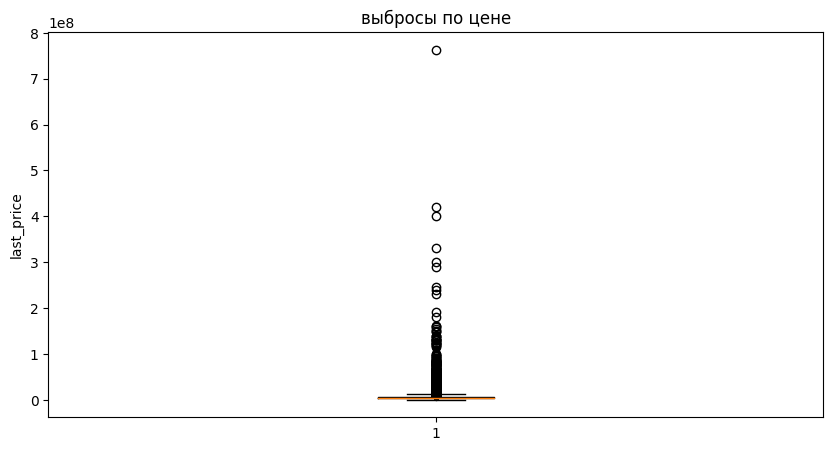

In [286]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['last_price'])
plt.title('выбросы по цене')
plt.ylabel('last_price')
plt.show()

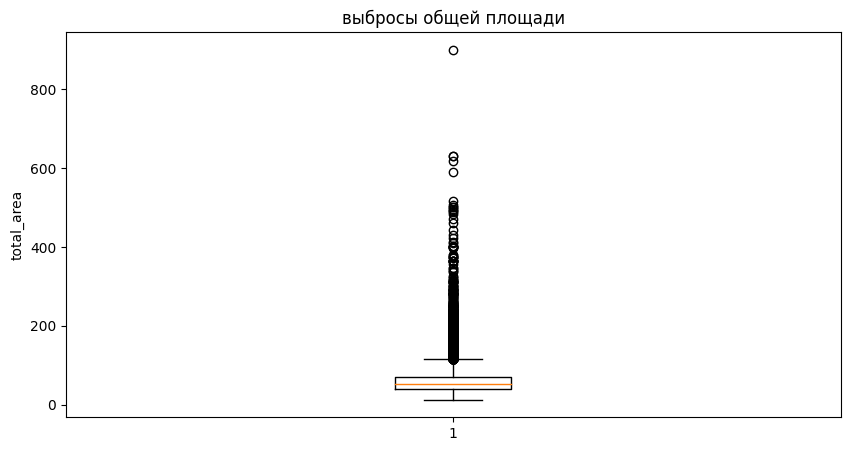

In [287]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['total_area'])
plt.title('выбросы общей площади')
plt.ylabel('total_area')
plt.show()

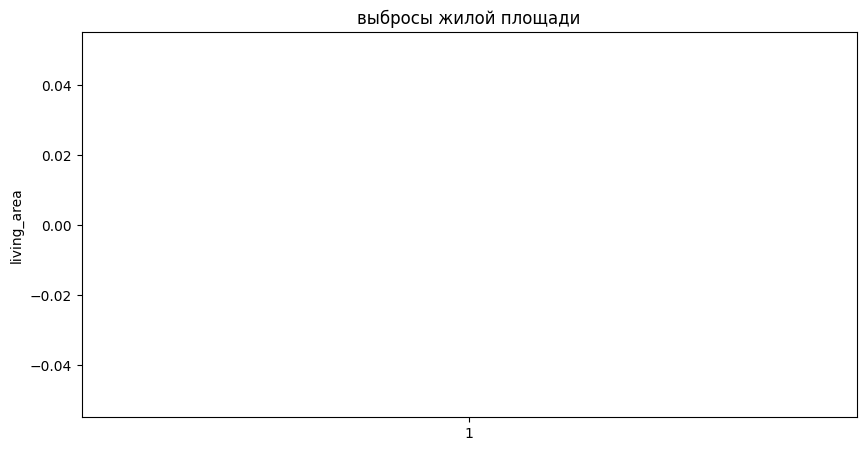

In [288]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['living_area'])
plt.title('выбросы жилой площади')
plt.ylabel('living_area')
plt.show()

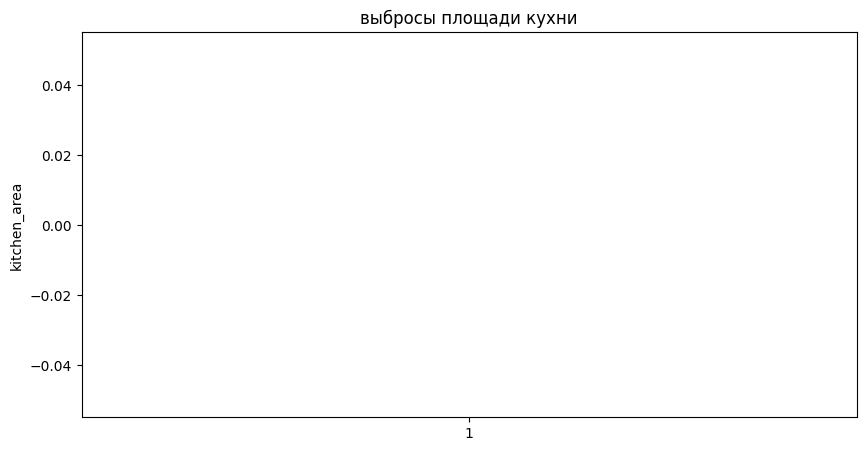

In [289]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['kitchen_area'])
plt.title('выбросы площади кухни')
plt.ylabel('kitchen_area')
plt.show()

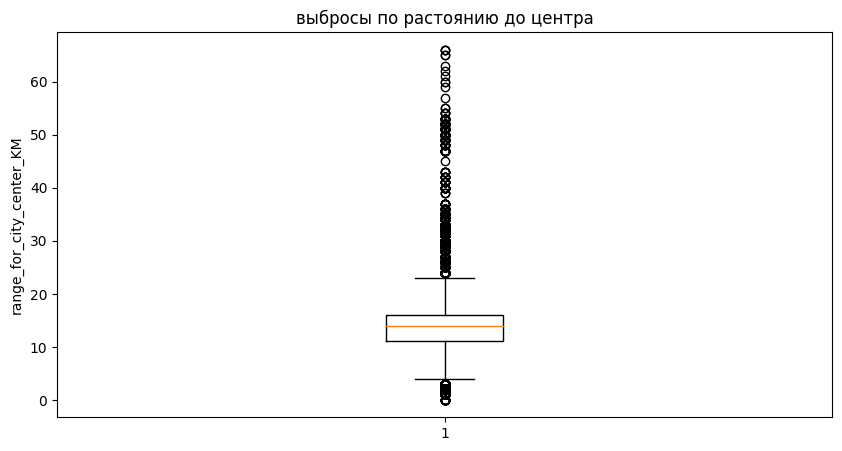

In [290]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['range_for_city_center_KM'])
plt.title('выбросы по растоянию до центра')
plt.ylabel('range_for_city_center_KM')
plt.show()

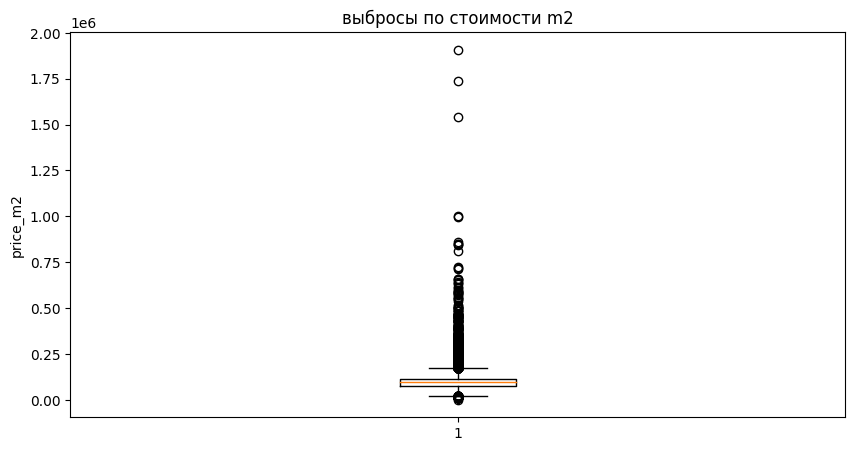

In [291]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['price_m2'])
plt.title('выбросы по стоимости m2')
plt.ylabel('price_m2')
plt.show()

In [292]:
data.shape[0]

23650

##### чистим от выбросов

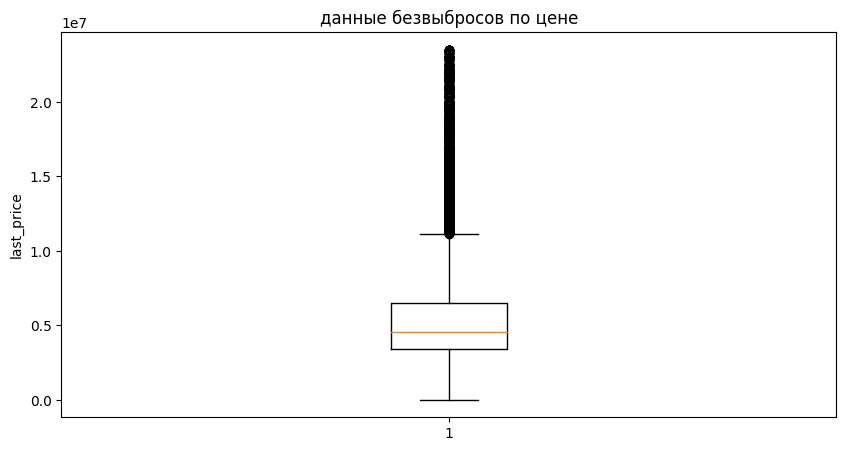

In [293]:
Q1 = data['last_price'].quantile(0.1)
Q3 = data['last_price'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#удаляем выбросы

data = data[(data['last_price'] >= lower) & (data['last_price'] <= upper)]

# выод отчищеных данных
plt.figure(figsize=(10, 5))
plt.boxplot(data['last_price'])
plt.title('данные безвыбросов по цене')
plt.ylabel('last_price')
plt.show()

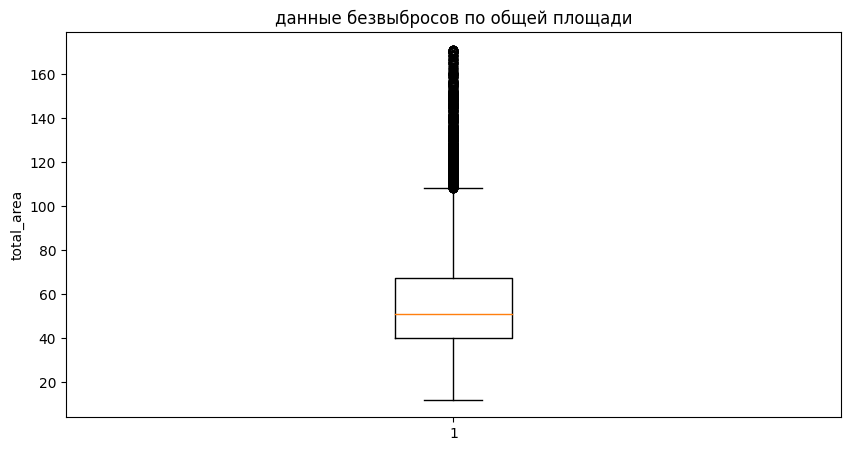

In [294]:
Q1 = data['total_area'].quantile(0.1)
Q3 = data['total_area'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#удаляем выбросы

data = data[(data['total_area'] >= lower) & (data['total_area'] <= upper)]

# выод отчищеных данных
plt.figure(figsize=(10, 5))
plt.boxplot(data['total_area'])
plt.title('данные безвыбросов по общей площади')
plt.ylabel('total_area')
plt.show()

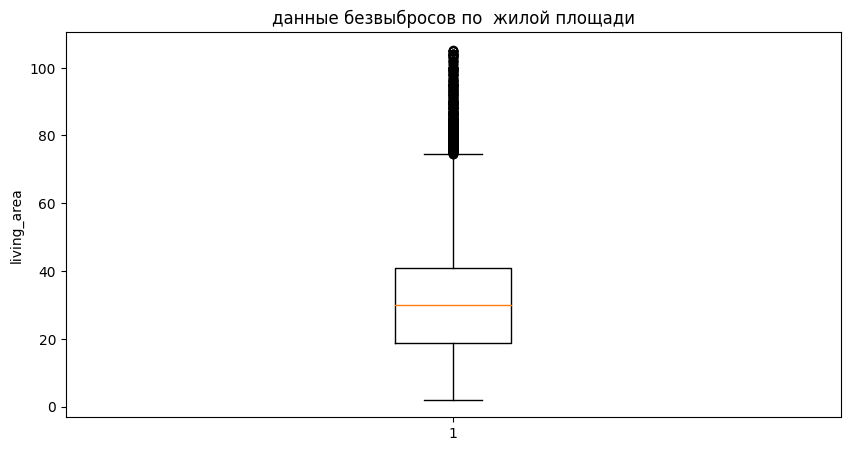

In [295]:
Q1 = data['living_area'].quantile(0.1)
Q3 = data['living_area'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#удаляем выбросы
data = data[(data['living_area'] >= lower) & (data['living_area'] <= upper)]


plt.figure(figsize=(10, 5))
plt.boxplot(data['living_area'])
plt.title('данные безвыбросов по  жилой площади')
plt.ylabel('living_area')
plt.show()

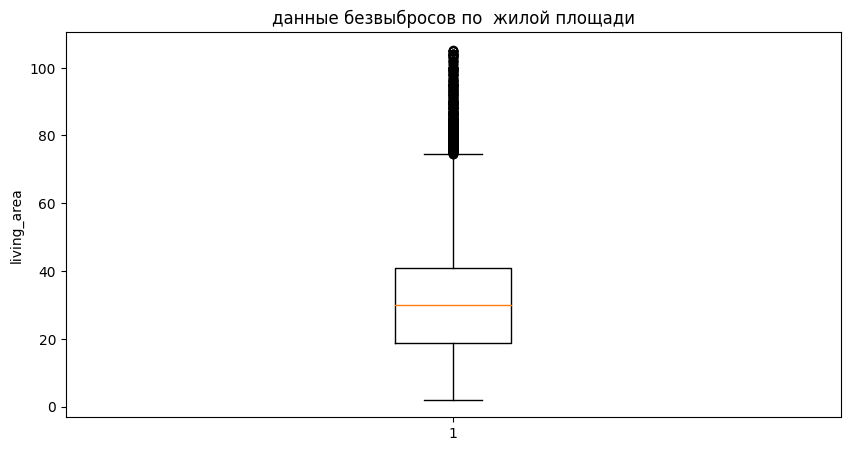

In [296]:
Q1 = data['living_area'].quantile(0.1)
Q3 = data['living_area'].quantile(0.9)

# Отсеиваемliving_areaвыбросы
data['last_price'] = data['living_area'].clip(lower=Q1, upper=Q3)

# выод отчищеных данных
plt.figure(figsize=(10, 5))
plt.boxplot(data['living_area'])
plt.title('данные безвыбросов по  жилой площади')
plt.ylabel('living_area')
plt.show()

In [297]:
data.shape[0]

22914

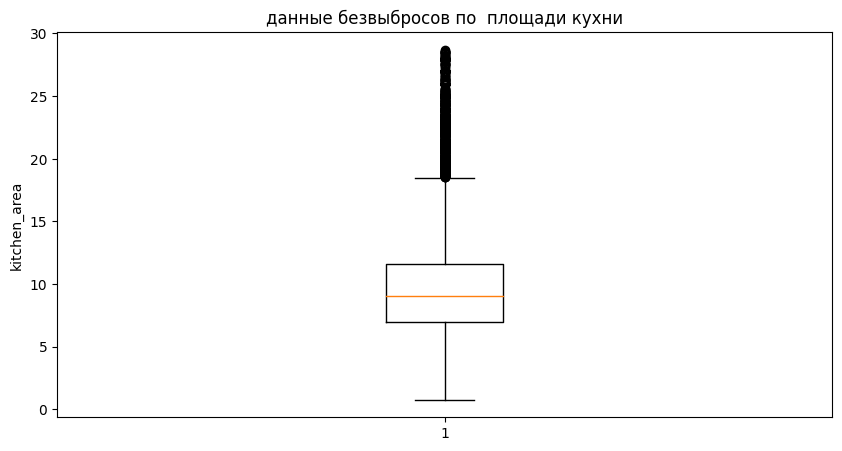

In [298]:
Q1 = data['kitchen_area'].quantile(0.1)
Q3 = data['kitchen_area'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#удаляем выбросы
data = data[(data['kitchen_area'] >= lower) & (data['kitchen_area'] <= upper)]


plt.figure(figsize=(10, 5))
plt.boxplot(data['kitchen_area'])
plt.title('данные безвыбросов по  площади кухни')
plt.ylabel('kitchen_area')
plt.show()

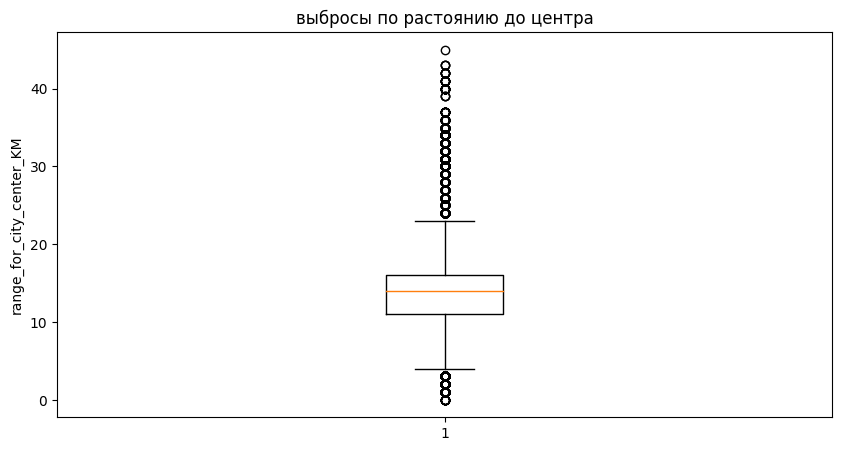

In [299]:
Q1 = data['range_for_city_center_KM'].quantile(0.1)
Q3 = data['range_for_city_center_KM'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#удаляем выбросы
data = data[(data['range_for_city_center_KM'] >= lower) & (data['range_for_city_center_KM'] <= upper)]

plt.figure(figsize=(10, 5))
plt.boxplot(data['range_for_city_center_KM'])
plt.title('выбросы по растоянию до центра')
plt.ylabel('range_for_city_center_KM')
plt.show()

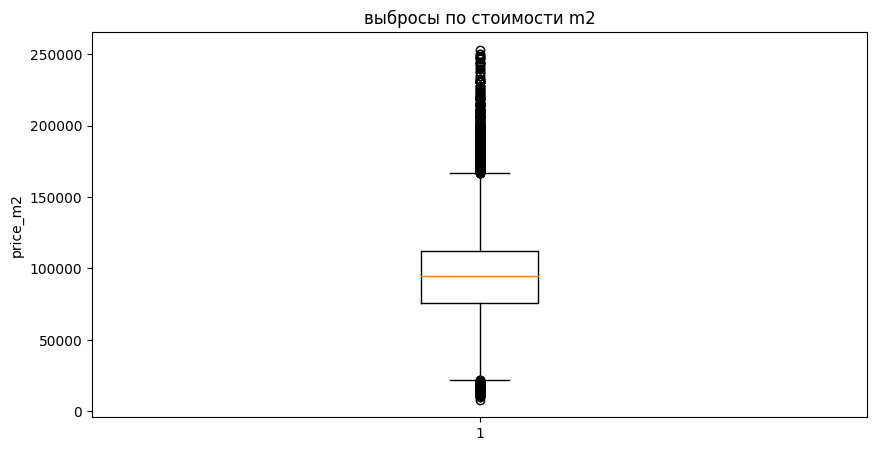

In [300]:
Q1 = data['price_m2'].quantile(0.1)
Q3 = data['price_m2'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#удаляем выбросы
data = data[(data['price_m2'] >= lower) & (data['price_m2'] <= upper)]


plt.figure(figsize=(10, 5))
plt.boxplot(data['price_m2'])
plt.title('выбросы по стоимости m2')
plt.ylabel('price_m2')
plt.show()

In [301]:
data.shape[0]

22344

##### вывод: выше представлены графики на которых видно выбросы данных,  они присутствуют везде (

####  Построена гистрограмма времени продажи в днях.

<Axes: >

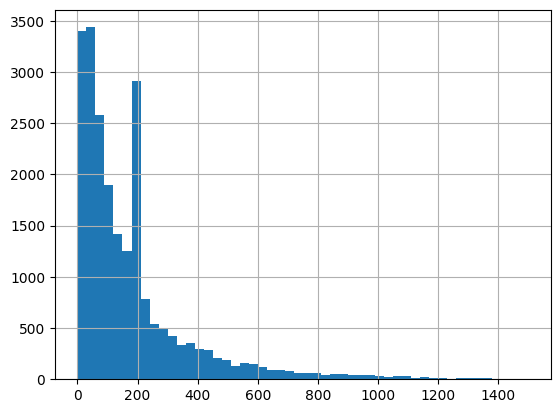

In [302]:
# По х располагаются дни сколько продавались, а по y количесво значений в диапазонах
data['days_exposition'].hist(range=(0, 1500), bins=50)

#### Вывод
большая часть квартир продается первый квартал со дная публикации, но есть и выбросы на двухста

#### Расчитаны среденне и медианное время продажи в днях.
    -отсеяны значения где было менее 10

In [303]:
# Считаем какие есть города и количесво объявлений в них
count_city = data.groupby('locality_name')['locality_name'].count()
# приравниваем в DataFrame чтобы можно было с ним работать
count_city_finall = pd.DataFrame({'locality_name': count_city.index, 'count': count_city.values})
# привим имена
count_city_finall.columns = ['city','count']

# Считаем среденее и меианное значение того сколько дней продавались объекты
stat_exposition = data.pivot_table(index='locality_name', values='days_exposition', aggfunc=['median', 'mean']).reset_index()
# привим имена
stat_exposition.columns = ['city','median', 'mean']
stat_exposition['mean'] = round(stat_exposition['mean'],1)


# соединяем две таблицы чтобы увидеть нагляно показатели
stat_exposition = stat_exposition.merge(count_city_finall, on='city')
stat_exposition.query('count > 10').sort_values(by  = 'count', ascending=False)

,city,median,mean,count
31,Санкт-Петербург,117.0,177.6,14767
95,поселок Мурино,77.0,148.6,555
162,поселок Шушары,102.0,154.9,438
3,Всеволожск,166.0,198.7,393
30,Пушкин,173.5,204.0,352
...,...,...,...,...
233,село Колтуши,94.0,210.4,11
249,село Малое Верево,160.0,160.0,11
255,село Мистолово,235.0,235.0,11
263,село Нурма,125.0,242.2,11


#### Cкорость продажи

In [304]:
stat_exposition['quantile_ex_3'] = pd.qcut(stat_exposition['mean'], 3, precision=0)
stat_exposition['quantile_ex_3'].unique()


[(4.0, 120.0], (212.0, 1007.0], (120.0, 212.0]]
Categories (3, interval[float64, right]): [(4.0, 120.0] < (120.0, 212.0] < (212.0, 1007.0]]


получены три пропорциональные выборки:
    
        - бытро 4.0, 120.0
        - средне 120.0, 211.0
        - долго 211.0, 1069.0

####  факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

##### соотношения общей площади к цене

0.878557114925111


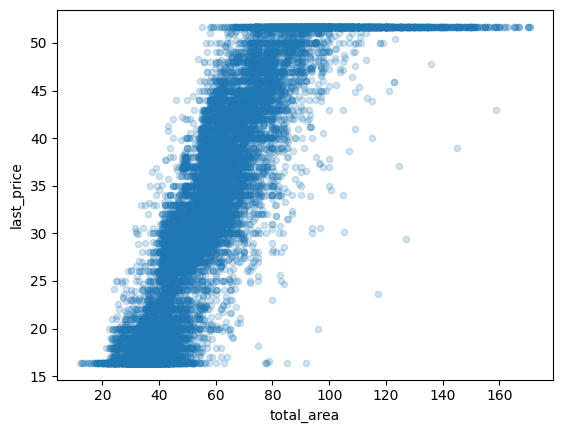

In [305]:
price_to_total_area = data[['last_price','total_area']]
price_to_total_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2)
print(price_to_total_area['last_price'].corr(price_to_total_area['total_area']))

##### соотношения жилой площади к цене

0.9489542952641477


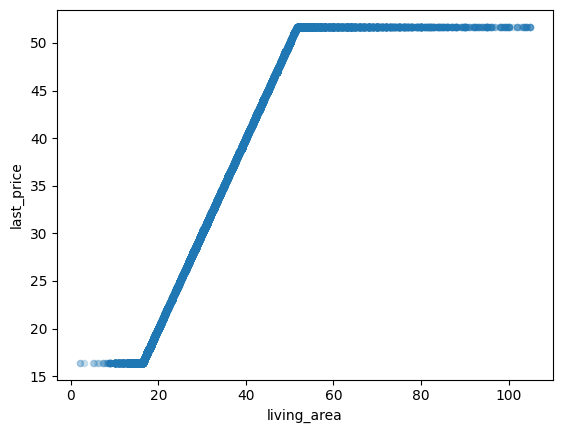

In [306]:
price_to_living_area = data[['last_price','living_area']]
price_to_living_area.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2)
print(price_to_living_area['last_price'].corr(price_to_living_area['living_area']))

##### соотношения площади кухни к цене

0.30472168919504944


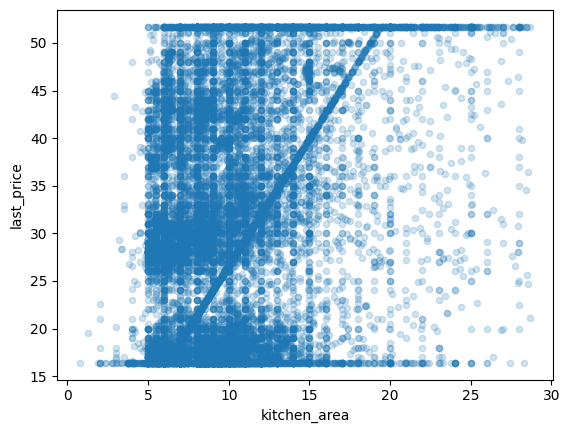

In [307]:
price_to_kitchen = data[['last_price','kitchen_area']]
price_to_kitchen.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2)
print(price_to_kitchen['last_price'].corr(price_to_kitchen['kitchen_area']))

##### соотношения этажа к цене

0.8880275002230722


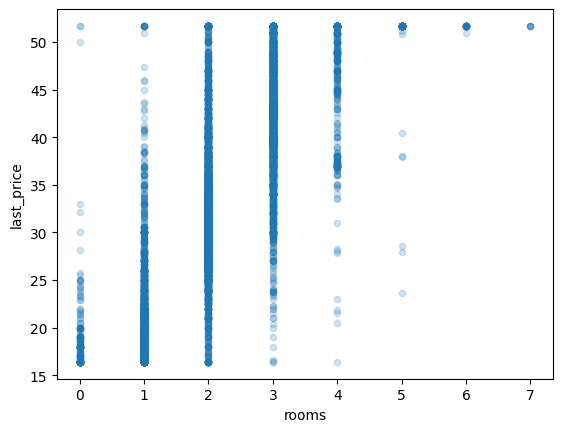

In [308]:
price_to_rooms = data[['last_price','rooms']]
price_to_rooms.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2)
print(price_to_rooms['last_price'].corr(price_to_rooms['rooms']))

##### зависимость между этажем  к цене

<Axes: xlabel='status_floor', ylabel='last_price'>

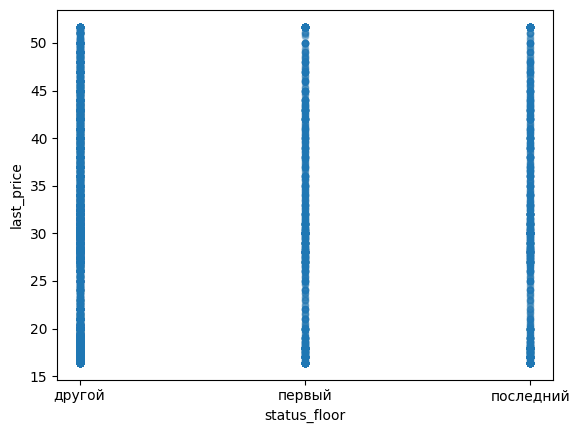

In [309]:
price_to_floor = data[['last_price','status_floor']]
price_to_floor.plot(x='status_floor', y='last_price', kind='scatter', alpha=0.1)


##### зависимость между днем / месяце / годом  к цене

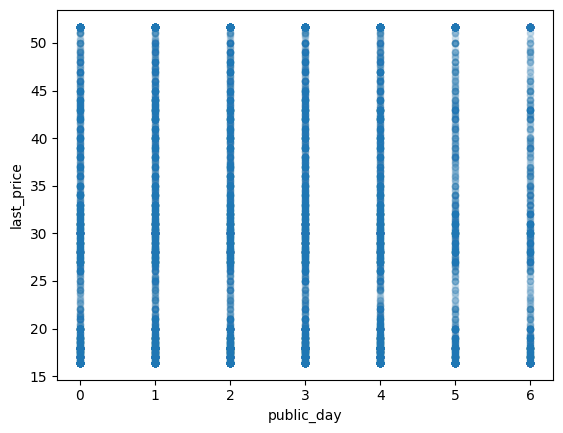

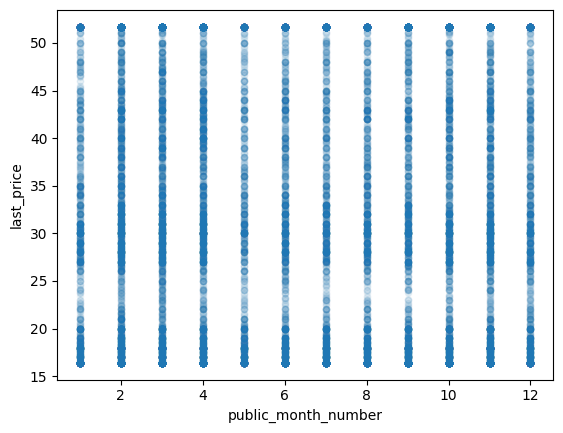

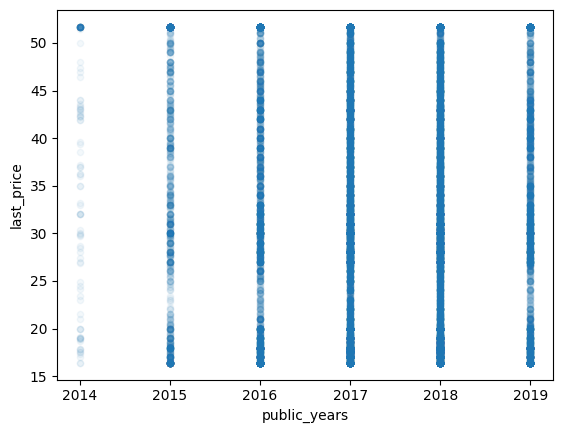

In [310]:
price_to_day = data[['last_price','public_day','public_month_number','public_years']]

#соотношения дня к цене
price_to_day.plot(x='public_day', y='last_price', kind='scatter', alpha=0.05)

#соотношения месяца к цене
price_to_day.plot(x='public_month_number', y='last_price', kind='scatter', alpha=0.05)

#соотношения года к цене
price_to_day.plot(x='public_years', y='last_price', kind='scatter', alpha=0.05)
plt.show()

##### Вывод, на графиках выше видно некоторые зависимости.
    Например:
        - чем больше площадь общая / жилая тем выше цена
        - а вот с кухнями такой зависимости очевидной нету
        - видно что с годами квартиры только дорожают (общая тенденция) но есть и выбросы
        - по мясяцу и дню такой зависимости нету, но еще 9лет назад было гораздо меньше объявлений.
        - квартиры на первом этаже дешевле чем все что выше

####  Среденяя цена 1m2 в 10 насленых пунктах Ленинградской области по найбольшему числу объявлений

In [311]:
first_ten_city  = count_city_finall.sort_values(by = 'count', ascending=False).reset_index(drop = True).head(10)
price_of_m = data[['locality_name', 'price_m2']]
price_of_m = round(price_of_m.groupby('locality_name')['price_m2'].mean(),2)


first_ten_city.columns = ['locality_name' ,'count']
first_ten_city = first_ten_city.merge(price_of_m, on='locality_name').sort_values(by = 'price_m2', ascending=False).reset_index(drop = True)
first_ten_city


,locality_name,count,price_m2
0,Санкт-Петербург,14767,108597.86
1,Пушкин,352,101575.60
2,село Кудрово,298,92542.25
3,поселок Парголово,326,90332.26
4,поселок Мурино,555,85680.77
5,поселок Шушары,438,78754.53
6,Колпино,337,75333.30
7,Гатчина,305,68727.95
8,Всеволожск,393,67137.70
9,Выборг,233,57949.68


#### Ниже представлена зависимость растояния(км)  от центра на стоимость квадратного метра

-0.2672212396038959


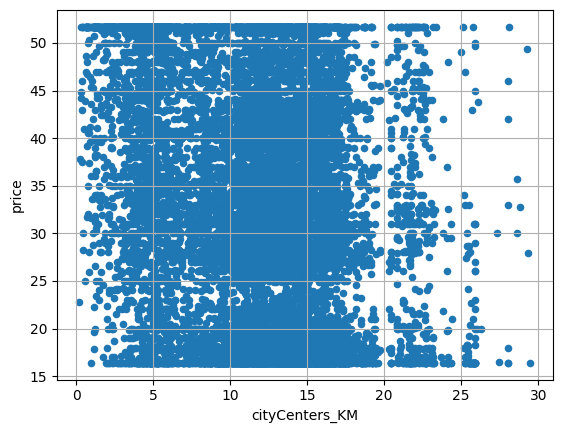

In [312]:
location_spb = data.query('locality_name == "Санкт-Петербург"')
location_spb = location_spb[['cityCenters_nearest', 'last_price']]
location_spb['cityCenters_nearest'] =  round(location_spb['cityCenters_nearest'] /1000, 2)
location_spb.columns = ['cityCenters_KM' ,'price']
location_spb

location_spb.sort_values(by = 'cityCenters_KM').plot(kind='scatter', x = 'cityCenters_KM',  y = 'price', grid = True)



print(location_spb['price'].corr(location_spb['cityCenters_KM']))


#### Вывод:
на графике изображена зависимость отдаленности объявлений от центра Санкт-Петербурга  на стоимость объявления. По графику и корреляции видно что чем дальше растоплена квартира от центра тем меньше там цена

### Напишите общий вывод

#### Результаты иследования
Проделана обработка датасата с пропусками, значения запонялись либо медианной либо средним, так же ко всем переменным был применен тип данных с которым можно работать.

Описанны типы данных в столбца и что в них хранится:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.

В таблицу добавлены следующие столбцы:
  - цена одного квадратного метра
  - день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
  - месяц публикации объявления
  - тип этажа квартиры (значения — «первый», «последний», «другой»)
  - расстояние до центра города в километрах.


Расчитаны следующие зависимости:

   - как быстро продавались квартиры:
       - построена гистограмма;
       - рассчитаны среднее и медиана;
       - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
       
   - Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
       - общая площадь;
       - жилая площадь;
       - площадь кухни;
       - количество комнат;
       - тип этажа, на котором расположена квартира (первый, последний, другой);
       - дата размещения (день недели, месяц, год).
       
   - Расчитана средняя стоимость метра в 10 населенных пунктах с наибольшим кол-вом оьбъявлений
       - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
       
   - Выполнен расчет зависимости средней стоимости метра на удаленность от центра Санкт-Петербурга.  
        -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
        -  описано, как стоимость объекта зависит от расстояния до центра города;
        -  построен график изменения средней цены для каждого километра от центра Петербурга.




Вывод:  
      Чем ближе квартиры к центру Санкт-Петербурга тем они дороже.
      Есть опреденный зависимости между тем когда опубликовано объявление и его ценой
      На цену влияют все факторы, некоторые делают дороже а некоторые дешевле
      Есть опредененная статистка по срокам продажи квартив в Ленинградской области.